# Модели стохастических объектов (методы анализа данных)
## Практическая работа №2
### КИ18-16 Прекель В.А.
### Вариант 14.
### Признаки `cat6_brandOfSoaps`, `cat2_hairColor`, `num1_15`, `num2_15`, `num3_15`.

In [37]:
from collections import Counter
from collections import Counter
from scipy.stats import sigmaclip
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
import scipy as scp
import seaborn as sns
import seaborn as ssn

In [44]:
all_data = pd.read_excel('practice_dataframe.xlsx')

data = pd.DataFrame({
    'cat6_brandOfSoaps': all_data['cat6_brandOfSoaps'],
    'cat2_hairColor': all_data['cat2_hairColor'],
    'num1_15': all_data['num1_15'],
    'num2_15': all_data['num2_15'],
    'num3_15': all_data['num3_15']
})
data

,cat6_brandOfSoaps,cat2_hairColor,num1_15,num2_15,num3_15
0,lux,black,282.228024,NaN,807.976365
1,NaN,Red,1039.089956,268.388947,444.529442
2,Lux,black,500.696085,174.992127,428.723966
3,lux,Red,1346.429995,108.647900,520.238037
4,Dove,black,230.576445,150.113065,896.476167
...,...,...,...,...,...
995,Dove,Red,422.732662,170.810692,586.254084
996,lux,Brown,783.565442,237.086397,826.693312
997,Dove,Red,410.595523,196.686858,600.377791
998,Lux,black,-237.136035,179.262913,371.380055


In [3]:
#data.describe()

,num1_15,num2_15
count,1000.000000,950.000000
mean,312.524662,148.963833
std,2443.714313,106.847552
min,-9999.000000,-184.922189
25%,246.738757,82.347973
50%,814.713260,145.220453
75%,1284.983740,215.636532
max,3201.191252,479.162302


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat6_brandOfSoaps  980 non-null    object 
 1   cat2_hairColor     980 non-null    object 
 2   num1_15            1000 non-null   float64
 3   num2_15            950 non-null    float64
 4   num3_15            971 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


Столбчатые для категориальных до форматирования

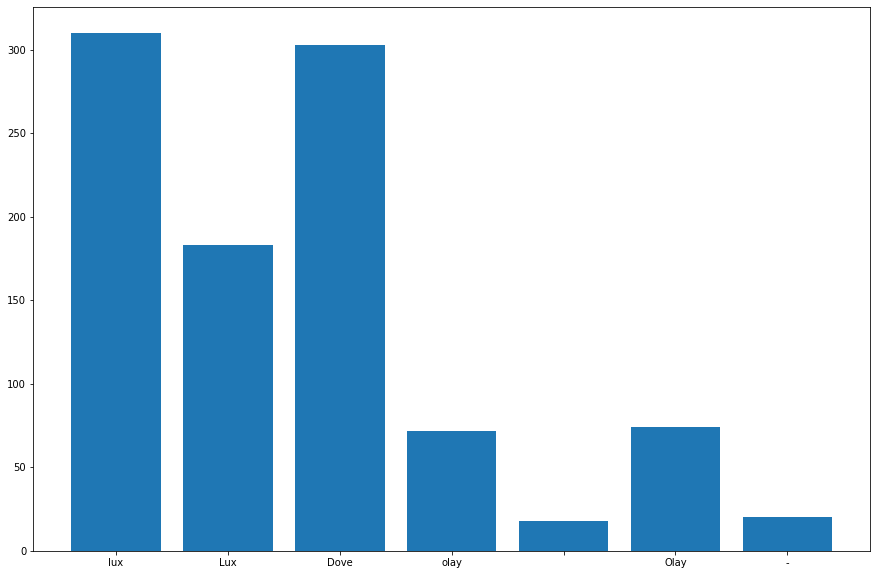

In [45]:
# cat6_brandOfSoaps
counts = Counter(data['cat6_brandOfSoaps'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

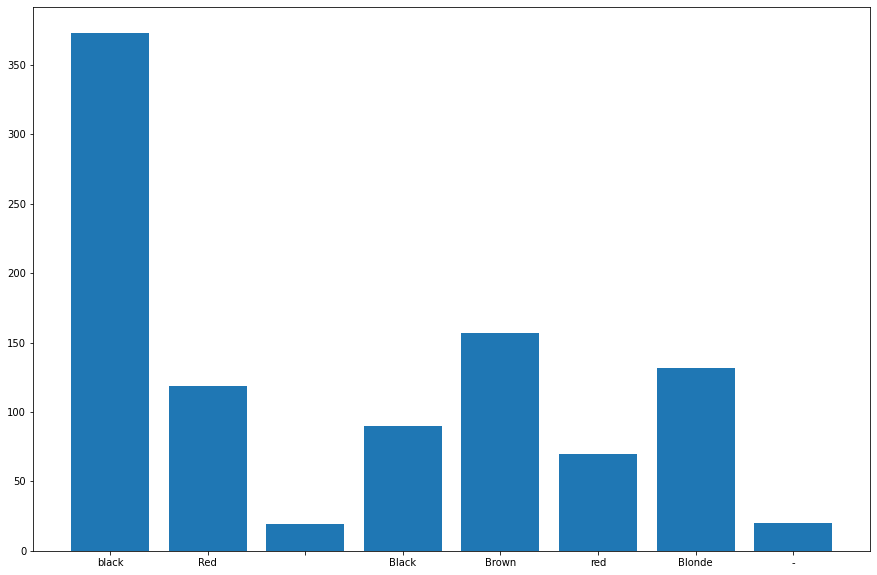

In [46]:
# cat2_hairColor
counts = Counter(data['cat2_hairColor'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

In [20]:
def base_format(data_frame: pd.DataFrame):
    return data_frame.replace({-9999: np.nan}).replace(r'^[\s-]*$', np.nan, regex=True)

def format_str(data_frame: pd.DataFrame):
    return base_format(data_frame).str.capitalize().str.rstrip()

data['cat6_brandOfSoaps'] = format_str(data['cat6_brandOfSoaps'])
data['cat2_hairColor'] = format_str(data['cat2_hairColor'])
data["num3_15"] = base_format(data['num3_15'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat6_brandOfSoaps  942 non-null    object 
 1   cat2_hairColor     941 non-null    object 
 2   num1_15            1000 non-null   float64
 3   num2_15            950 non-null    float64
 4   num3_15            913 non-null    float64
 5   num3_15f           913 non-null    float64
dtypes: float64(4), object(2)
memory usage: 47.0+ KB


In [21]:
# # Форматирование дата фрейма
#
# formatted_values = {
#     'cat6_brandOfSoaps': format_str(data['cat6_brandOfSoaps']),
#     'cat2_hairColor': format_str(data['cat2_hairColor']),
#     'num1_15': base_format(data['num1_15']),
#     'num2_15': base_format(data['num2_15']),
#     'num3_15': base_format(data['num3_15'])
# }
# f_df = pd.DataFrame(formatted_values)
# f_df.info()

In [22]:
# data_trait1 = data['cat6_brandOfSoaps']
# data_trait2 = data['cat2_hairColor']
# data_trait3 = data['num1_15']
# data_trait4 = data['num2_15']
# data_trait5 = data['num3_15']
#
# data_traits = [data_trait1, data_trait2, data_trait3, data_trait4, data_trait5]
#
# data_traits_str = [data_trait1, data_trait2]
# data_traits_num = {"num1_15": data_trait3, "num2_15": data_trait4, "num3_15": base_format(data_trait5)}

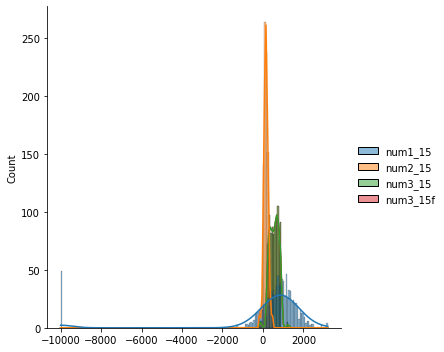

In [23]:
sns.displot(data=data, kde=True)

Ящик с усами для числовых

<AxesSubplot:ylabel='num1_15'>

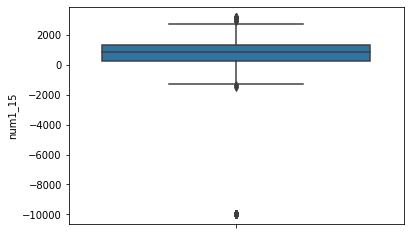

In [47]:
# num1_15
sns.boxplot(y=data['num1_15'])

<AxesSubplot:ylabel='num2_15'>

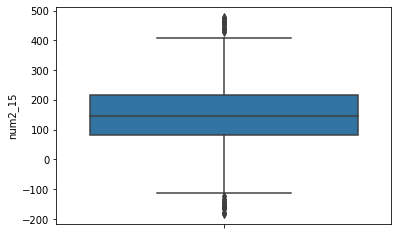

In [25]:
# num2_15
sns.boxplot(y=data['num2_15'])

In [48]:
# num3_15
sns.boxplot(y=data['num3_15'])

TypeError: Vertical orientation requires numeric `y` variable.

Столбчатые для категориальных

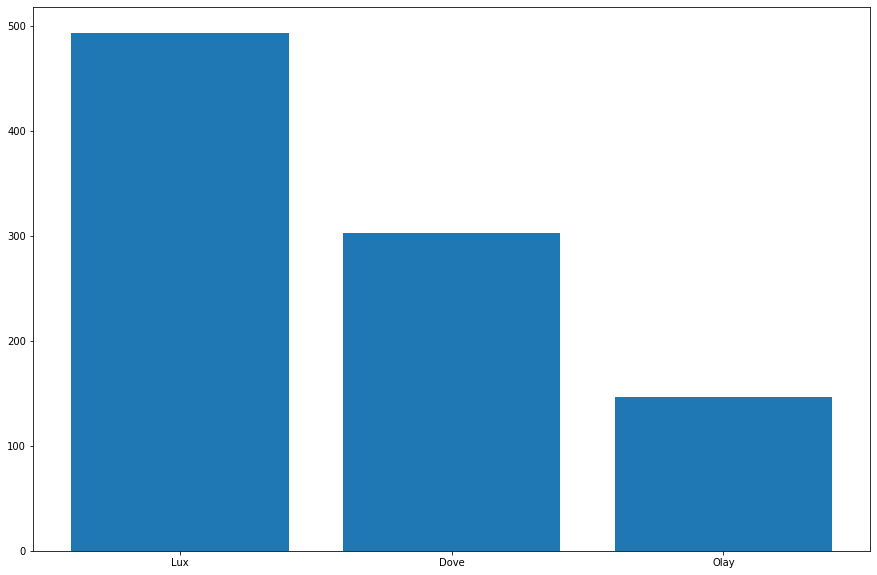

In [27]:
# cat6_brandOfSoaps
counts = Counter(data['cat6_brandOfSoaps'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

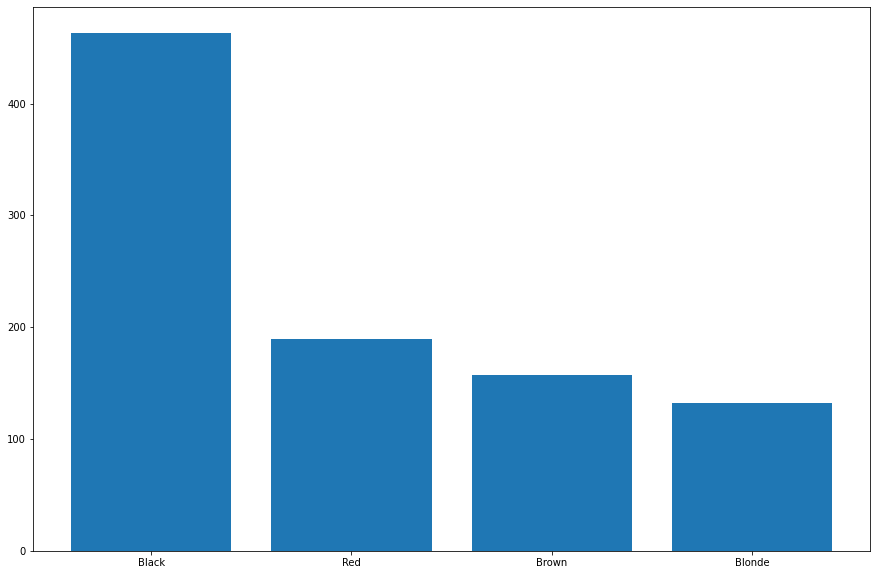

In [28]:
# cat2_hairColor
counts = Counter(data['cat2_hairColor'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

#### 2. Провести проверку правдоподобности исходных данных

In [29]:
data

,cat6_brandOfSoaps,cat2_hairColor,num1_15,num2_15,num3_15,num3_15f
0,Lux,Black,282.228024,NaN,807.976365,807.976365
1,NaN,Red,1039.089956,268.388947,444.529442,444.529442
2,Lux,Black,500.696085,174.992127,428.723966,428.723966
3,Lux,Red,1346.429995,108.647900,520.238037,520.238037
4,Dove,Black,230.576445,150.113065,896.476167,896.476167
...,...,...,...,...,...,...
995,Dove,Red,422.732662,170.810692,586.254084,586.254084
996,Lux,Brown,783.565442,237.086397,826.693312,826.693312
997,Dove,Red,410.595523,196.686858,600.377791,600.377791
998,Lux,Black,-237.136035,179.262913,371.380055,371.380055


#### 3. Поиск аномальных значений

<AxesSubplot:>

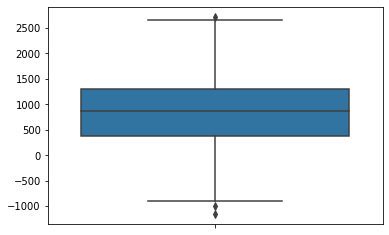

In [50]:
c, low, up = sigmaclip(data['num1_15'].dropna(), 3, 3)
sns.boxplot(y=c)

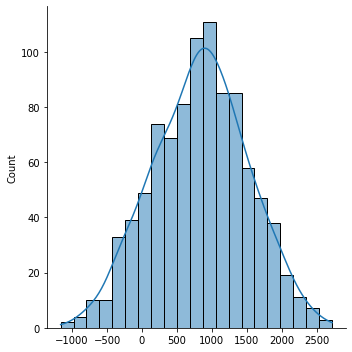

In [51]:
sns.displot(c, kde=True)

<AxesSubplot:>

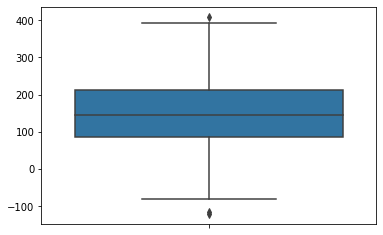

In [52]:
c, low, up = sigmaclip(data['num2_15'].dropna(), 3, 3)
sns.boxplot(y=c)

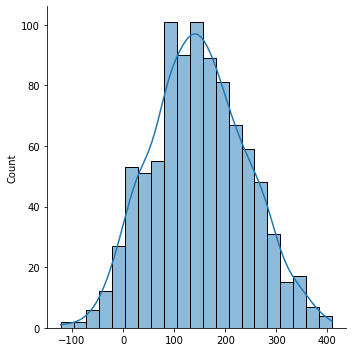

In [53]:
sns.displot(c, kde=True)

<AxesSubplot:>

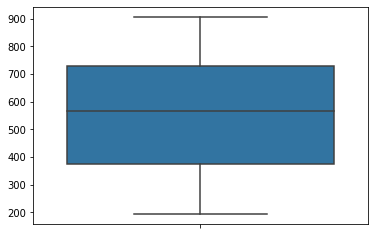

In [17]:
c, low, up = sigmaclip(data['num3_15f'].dropna(), 3, 3)
sns.boxplot(y=c)

In [ ]:
sns.displot(c, kde=True)

<AxesSubplot:>

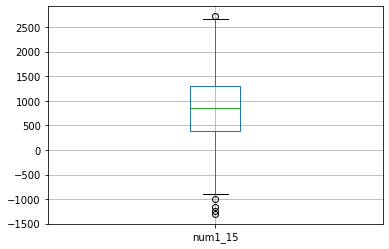

In [18]:
# Метод квантилей

q1 = np.nanquantile(data['num1_15'], 0.25)
q3 = np.nanquantile(data['num1_15'], 0.75)
iqr = q3 - q1
data.query("@q1 - 1.5*@iqr < num1_15 < @q3 + 1.5*@iqr").boxplot(column='num1_15')

#### 4. Поиск и восстановление пропущенных значений

KNN для `cat6_brandOfSoaps`

Cамым популярным значением для `cat2_hairColor`

Среднее для `num1_15`

Медиана для `num2_15`

KNN для `num3_15`
